$\renewcommand{\fl}{\operatorname{fl}}$

# Introdução

O computador é uma máquina finita, feita a partir de um número finito de objetos e capaz de armazenar e manipular um número finito de dados. Fica então a dúvida: como ele pode armazenar ou fazer contas com números que não admitem representação finita, como os números irracionais?  Como se pode calcular o $\sin(\pi)$ se o computador não pode armazenar o $\pi$, pelo menos não completamente? Isso não pode ser feito exatamente.

O que se pode fazer então é armazenar uma aproximação de $\pi$, uma aproximação muito boa, que será usada no lugar do número verdadeiro. Para a grande maioria das situações isso é bom o suficiente. O objetivo dessa primeira parte do curso é discutir um pouco sobre como o computador guarda os números, que tipo de garantia podemos esperar na qualidade das aproximações feitas e que problemas podem surgir devido a essas aproximações. Isso é especialmente importante quando lembramos que podemos executar milhões, ou até bilhões de operações em sequência, cada uma com um pequeno erro. Esses erros se acumulam? Eles se cancelam?

Primeiros vejamos o que é $\pi$ para o computador:

In [2]:
π

π = 3.1415926535897...

Float64(π)
BigFloat(π)

In [1]:
BigFloat(π)

3.141592653589793238462643383279502884197169399375105820974944592307816406286198

A melhor representação que podemos obter é
$$
\pi \approx 0{,}3146 \cdot 10^1.
$$

Note que em particular o menor número representável em módulo no nosso sistema é $0{,}1000 \cdot 10^{-99}$ e o maior $0{,}9999 \cdot 10^{99}$.

Agora qual é o sistema de ponto flutuante adotado no computador? Quase todas as máquinas modernas implementam o padrão IEEE 754. Ele define dois tipos básicos de números. Números de precisão simples (o `float` de C), ocupam 32 bits divididos entre 1 bit para o sinal, 8 bits para o expoente e 23 para mantissa. Já a precisão dupla (o `double` de C) usa um bit para o sinal, 11 para o expoente e 52 para a mantissa totalizando 64 bits. 

Em base decimal isso nos dá, em precisão dupla, um número com aproximadamente 15 casas decimais na mantissa e expoente indo de -1022 a 1023. Quem quiser mais informações sobre o padrão IEEE 754 pode consultar esse [texto](http://steve.hollasch.net/cgindex/coding/ieeefloat.html).

Um fato interessante em sistemas de ponto flutuante é que há buracos entre os números representáveis, já que existe um número finito deles. Isto sifingica que que nem todos os números reais tem representação em sistemas de ponto flutuante. Isso vai ocasionar algumas situações interessantes como, por exemplo, o fato de que o elemento neutro da soma não é único.

Em particular depois do número 1 (que é representável usando mantissa 0,1 e expoente 1) há um primeiro próximo número representável. O que ocorre se tentarmos somar ao 1 um número tão pequeno que a soma resultante esteja mais perto do 1 do que desse próximo número? Vamos querer que a resposta seja o próprio 1, já que esse é o número representável mais próximo da resposta correta. Ou seja, se $u$ é pequeno vamos querer que o computador devolva como resultado da operação
$$
1 + u
$$
o próprio 1! Vamos normalmente denotar os resultados calculados pelo computador através do operador $\fl$. Usando essa notação vemos que para $u$ pequeno
$$
\operatorname{fl}(1 + u) = 1.
$$
Vamos chamar de *unidade de arredondamento*, ou *epsilon da máquina*, denotado por $\epsilon_{mac}$, o menor número para o qual ainda resulta que $\operatorname{fl}(1 + \epsilon_{mac}) > 1$. Isso é, basicamente, a metade da distância entre o 1 e o próximo número representável. Esse número nos dá uma ideia de quantas casas de precisão o nosso sistema tem. Em particular no caso do padrão IEEE 754 temos as unidades de arredondamento:

1. Precisão simples: $\epsilon_{mac} \approx 1{,}19209 \cdot 10^{-7}$.

1. Precisão dupla: $\epsilon_{mac} \approx 2{,}22045 \cdot 10^{-16}$.

O padrão IEEE 754 além de definir esses dois sistemas de ponto flutuante obriga ainda que as operações aritméticas básicas sejam realizadas de modo a garantir que o valor obtido ao final é a melhor representação possível do valor exato. Isso é, dados dois números representáveis $x_1$ e $x_2$ o sistema IEEE 754 exige que o computador implemente a sua versão da soma, que vamos representar por $\oplus$, de modo que $x_1 \oplus x_2$ seja o número representável mais próximo de $x_1 + x_2$. Em particular, isso garante que o erro
$$
| (x_1 \oplus x_2) - (x_1 + x_2) | \leq \epsilon_{mac} |x_1 + x_2|
$$
Ou seja, o erro relativo ao se fazer a operação de soma como implementada seguindo ao padrão IEEE 754 é no máximo $\epsilon_{mac}$. Isso não vale apenas para a operação de soma, vale para todas as operações aritméticas fundamentais que são soma, subtração, multiplicação, divisão e cálculo da raiz quadrada.

## Erros de cancelamento

Quando ficamos sabendo da propriedade descrita acima, isto, é que o computador implementando o padrão IEEE 754 é capaz de garantir a execução das operações básicas com erro relativo máximo proporcional ao epsilon da máquina, ficamos com a impressão que essas operações não são capazes de gerar muitas dificuldades numéricas. Afinal de contas, para números de precisão dupla, isso dá impressão que os valores calculados estarão corretos pelo menos até a décima quinta casa. Parece mais do que o suficiente. Porém há um caso, que muitas vezes ignoramos em uma primeira leitura, que pode trazer muitos problemas. O fenômeno é conhecido como *erro de cancelamento*. Vamos ver primeiro um exemplo em que ele ocorre e depois discutir o que ocorreu.

Considere que queremos calcular $49213 + 31{,}728 − 49244 = 0{,}728$ em um computador com sistema decimal e cinco casas na mantissa. Note que, como todos os números da conta original têm cinco casas, parece que não estamos pedindo nada demais. A primeira operação executada obtém
$$
\operatorname{fl}(49213 + 31{,}728) = \operatorname{fl}(49244{,}728) = 49245.
$$ 
Note o resultado final armazenado é tão bom como prometido. Ele tem cinco casas corretas. De fato, o erro relativo é
$$
\frac{|49245 - 49244{,}728|}{|49244{,}728|} \approx 5{,}523 \cdot 10^{-6},
$$
que é próximo ao epsilon da máquina. 

Agora fazemos a operação final, **usando o resultado já calculado**,
$$
\operatorname{fl}(49245 - 49244) = \operatorname{fl}(1) = 1.
$$
Veja que esse resultado tem quase nenhuma relação com o valor exato que é 0,728. Ele apenas acerta a ordem de grandeza. Mas **não tem nenhum dígito correto**, muito menos os cinco dígitos significativos esperados.

O que ocorreu? Como explicar um resultado tão ruim? O problema está na operação de subtração entre dois números muito parecidos presente na segunda operação. Quando dois números muito parecidos são subtraídos, os dígitos mais significativos "somem" e o resultado final fica limitado no número de dígitos significativos que se pode armazenar. Não há o que fazer. Esse é o caso da subtração $49245 - 49244$. Os quatro dígitos mais importantes são iguais, então apenas o último dígito carrega alguma informação gerando o $1$. Os outros quatro dígitos, apesar de corretos, são zeros à esquerda que nem escrevemos pois não servem para nada. Isso estaria perfeito se a conta que gostaríamos de fazer fosse exatamente essa. Mas o 49245 é apenas uma aproximação, pois foi obtido de outra operação. Para obter uma resposta com mais dígitos significativos na subtração seria necessário relembrar justamente o que foi esquecido ao se aproximar o valor exato da primeira conta, que era 49244,728, por 49245. Mas não há como voltar atrás, a informação do 0,728 já foi esquecida e não pode ser recuperada. Já os dígitos mais significativos se cancelam. Daí vem o nome desse fenômeno: *erro de cancelamento*.

Agora se usarmos esse número para novos cálculos não podemos garantir muita precisão no resultado final. Isso porque um dos números envolvidos tem apenas a ordem de grandeza correta e essa precisão muito baixa vai se propagar, destruindo a precisão de novos resultados calculados com base nessa aproximação grosseira.

Desse modo, ao calcularmos valores no computador devemos prestar bastante atenção quando fazemos subtrações entre números potencialmente parecidos (ou soma de números de módulo parecido mas sinais distintos). Muitos problemas numéricos ocorrem quando contas aparentemente inocentes geram números similares que têm que ser subtraídos.

Vamos ver agora vários exemplos de possíveis erros de cancelamento e discutir algumas estratégias para evitá-los.

### Exemplos de erros de cancelamento

Considere a seguinte expressão $\sqrt{x^2 + 1} - x$. Quando ela irá gerar erros de cancelamento? Se você pensar um pouco, à medida que $x$ vai para $\infty$ o valor $x^2 + 1$ fica relativamente mais perecido com o $x^2$. O $1$ se torna irrelevante perante o $x^2$ que é muito grande. Assim a raiz quadrada desse valor deve ficar muito próxima de $| x |$. Quando fomos subtrair essa raiz quadrada $x$, que é positivo, teremos erro de cancelamento.

Podemos então prever que $\sqrt{x^2 + 1} - x$ deve gerar erros de cancelamento para $x$ grande. Para ver isso vamos aproximar o erro relativo comparando números calculados com precisão simples com números calculados com precisão dupla.

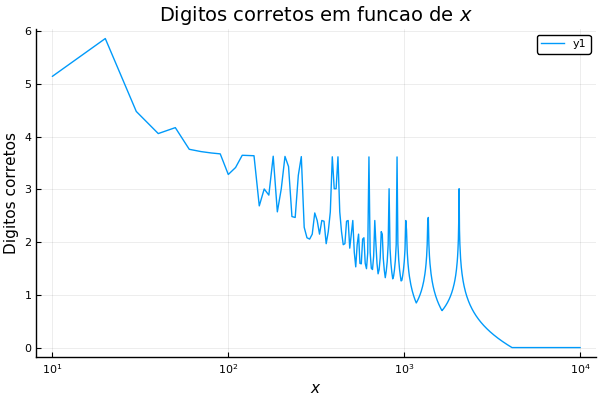

In [8]:
# Edite abaixo para fazer testes com outras expressões se desejar. 

# Expressão que se deseja estudar
function expr(x)
    return sqrt.(x.^2 .+ 1) - x
end

# Intervalo de teste [a, b]
a, b = 1.0e+1, 1.0e+4

################### Possivelmente você não quer editar a partir daqui.

# Se prepara para usar rotinas que plotam gráficos bem como LaTeX.
using Plots
using LaTeXStrings
pyplot()
# Erro relativo
function erro_rel(x, xh)
    return abs.(x - xh) ./ abs.(xh)
end

# Calcula valores das expressões com precisão simples e dupla para x crescente
x = range(a, stop=b, length=1000)
x = map(BigFloat,x)
expr_dupla = expr(x)
x_simples = map(Float32, x)
expr_simples = expr(x_simples)

# Apresenta o gráfico dos erros relativos.
# Lembre que quando o erro é 1 não há mais nenhum dígito significativo.
log_errorel = - log10.(erro_rel(expr_simples, expr_dupla))
plot(x, log_errorel,xaxis = (:log10), 
    # Para deixar o gráfico bonito
    title =L"Digitos corretos em funcao de $x$", 
    ylabel ="Digitos corretos",
    xlabel =L"x")

Como você pode ver, a precisão começa razoável. Há mais de 5 casas significativas. O número de casas significativas cai rapidamente chegando a 0 antes de $x = 10^4$. 

Será que é possível evitar esse erro? Será que é possível  re-escrever a expressão de modo a evitar o problema para $x$ grande? A resposta é sim, veja:

$$
(\sqrt{x^2 + 1} - x)(\sqrt{x^2 + 1} + x) = x^2 + 1 - x^2 = 1.
$$
Ou seja,
$$ 
\sqrt{x^2 + 1} - x = \frac{1}{\sqrt{x^2 + 1} + x}.
$$
Essa última expressão não tem erros de cancelamento quando $x$ é grande, já que não ocorre subtração de valores próximos. Note o que ocorre ao usarmos essa expressão para o cômputo da fórmula.

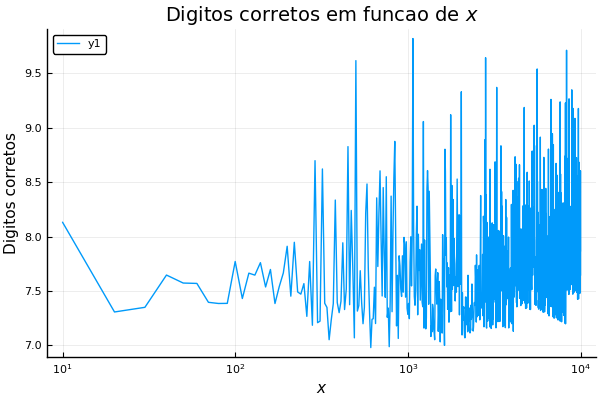

In [6]:
# Versão alternativa que evita erros de cancelamento. Edite-a se quiser fazer testes.
function expr_alt(x)
    return 1 ./ (sqrt.(x.^2 .+ 1) + x)
end

################### Possivelmente você não quer editar a partir daqui.

# Calcula a expressão pela fórmula alternativa
expr_simples_alt = expr_alt(x_simples)
# Apresenta o gráfico dos erros, note que quando o erro é 1 não há mais nenhum dígito significativo.
log_errorel = log10.(erro_rel(expr_simples_alt, expr_dupla))
# Elimina os pontos sem erro
log_errorel = -log_errorel[.~isinf.(log_errorel)]
# Plota o gráfico
plot(x, log_errorel,xaxis = (:log10),
#     Para deixar o gráfico bonito
    title ="Digitos corretos em funcao de \$x\$", 
    ylabel ="Digitos corretos",
    xlabel ="\$x\$")


Veja como o erro relativo se mantém na ordem do epsilon da máquina para a precisão simples, ou seja $10^{-8}$.

Os exemplos abaixo também apresentam erros de cancelamento para alguns valores de $x$. Identifique esses  valores e apresente uma fórmula alternativa que evita o problema. Pode ser interessante aproveitar o código acima e estudar o erro para *ver* se a sua solução está correta.

1. $\sqrt{1 + x}  - 1$.

1. $\log x - \log y$.

1. $(1 - \cos x)/\sin x$.



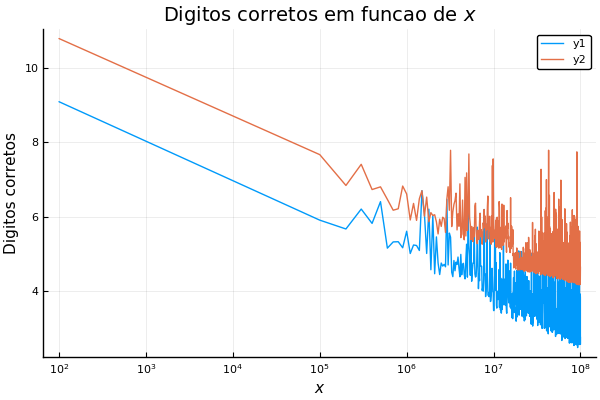

In [11]:
# Teste aqui seu código
function expr(x,y)
    return log.(x) .- log.(y)
end
# Intervalo de teste [a, b]
a, b = 1.0e2, 1.0e8

x = range(a, stop=b, length=1000)
y = x .+ 1e-4
x = map(BigFloat,x)
y = map(BigFloat,y)
expr_dupla = expr(x,y)
x_simples = map(Float64, x)
y_simples = map(Float64, y)
expr_simples = expr(x_simples,y_simples)

# Apresenta o gráfico dos erros relativos.
# Lembre que quando o erro é 1 não há mais nenhum dígito significativo.
log_errorel = - log10.(erro_rel(expr_simples, expr_dupla))
plot(x, log_errorel,xaxis = (:log10), 
    # Para deixar o gráfico bonito
    title ="Digitos corretos em funcao de \$x\$", 
    ylabel ="Digitos corretos",
    xlabel ="\$x\$")

# # Versão alternativa que evita erros de cancelamento. Edite-a se quiser fazer testes.
function expr_alt(x,y)
    return log.(x./y)
end

# ################### Possivelmente você não quer editar a partir daqui.

# # Calcula a expressão pela fórmula alternativa
expr_simples_alt = expr_alt(x_simples,y_simples)
# Apresenta o gráfico dos erros, note que quando o erro é 1 não há mais nenhum dígito significativo.
log_errorel = log10.(erro_rel(expr_simples_alt, expr_dupla))
# Elimina os pontos sem erro
log_errorel = -log_errorel[.~isinf.(log_errorel)]
# # Plota o gráfico
plot!(x, log_errorel,xaxis = (:log10),
#     Para deixar o gráfico bonito
    title ="Digitos corretos em funcao de \$x\$", 
    ylabel ="Digitos corretos",
    xlabel ="\$x\$")

### Um exemplo mais sofisticado

Um exemplo mais sofisticado aparece quando resolvemos equações do segundo grau. Nesse caso sabemos que as raízes desejadas podem ser obtidas através da fórmula de Báskara. Se queremos as raízes de $ax^2 + bx + c = 0$, calculamos
$$
\Delta = b^2 - 4ac,\quad\quad x = \frac{-b \pm \sqrt{\Delta}}{2a}.
$$
E a implementação direta dessa formula é dada abaixo.

In [13]:
function raizes(a, b, c)
    Δ = b^2 - 4*a*c
    if Δ < 0
        println("Delta negativo!")
    else
    return (-b + sqrt(Δ))/(2*a), (-b - sqrt(Δ))/(2*a)
    end
end

# (x - 1.5)(x - 10) = x^2 - 11.5x + 15
raizes(1.0, -11.5, 15)

(10.0, 1.5)

Problema resolvido. Parece que não há mais nada para fazer.

Mas se pensarmos um pouco é possível antecipar algumas situações em que a formula de Báskara pode sofrer de erros de cancelamento. Ela ainda é simples o suficiente para permitir alguma análise direta.

Observemos inicialmente que há duas somas, uma para achar o delta seguida de outra para achar as raízes. Infelizmente não se conhece uma forma de evitar o possível erro de cancelamento que pode surgir na fórmula do delta. Ele está associado a delta próximo de zero, ou seja $4ac$ negativo e com valor próximo a $b^2$. Vamos ver o que podemos fazer com a fórmula das raízes,
$$
x = \frac{-b \pm \sqrt{\Delta}}{2a}.
$$
Nela o valor de $-b$ será somando com valores positivos e negativos, ou seja necessariamente em um dos casos não há erro de cancelamento, pois os sinais serão iguais. Já quando $-b$ é positivo um possível erro de cancelamento ocorre quando calculamos $-b - \sqrt{\Delta}$. Caso $-b$ seja negativo a dificuldade pode ocorrer quando computamos $-b + \sqrt{\Delta}$. Além disso o cancelamento ocorre quando o $-b$ e $\sqrt{\Delta}$ tem módulos muito próximos. 

Vamos analisar com cuidado um caso particular. Inicialmente, vamos fixar $a = 1$, isso sempre pode ser feito dividindo a equação original por $a$. Vamos também supor que $b = -1$, assim $-b = 1$. Nesse caso a fórmula da raiz associada ao à situação de cancelamento é $1 - \sqrt{1 - 4c}$, que terá problemas para $c$ pequeno. Vamos ver se isso de fato ocorre. Para isso vamos usar o zero calculado com números `BigFloat` para comparação. O Julia permite que criemos números com qualquer precisão pré-definida usando esse tipo. O padrão é usar 256 bits de precisão, o que dá quatro vezes a precisão dupla que estamos mais acostumados. Se você quiser ainda mais bits de precisão basta usar a função `set_bigfloat_precision`. A desvantagem desse tipo de número é que as operações tornam-se muito mais lentas do que operações feitas com números do padrão IEEE 754, já que o `BigFloat` tem implementação feita por software.

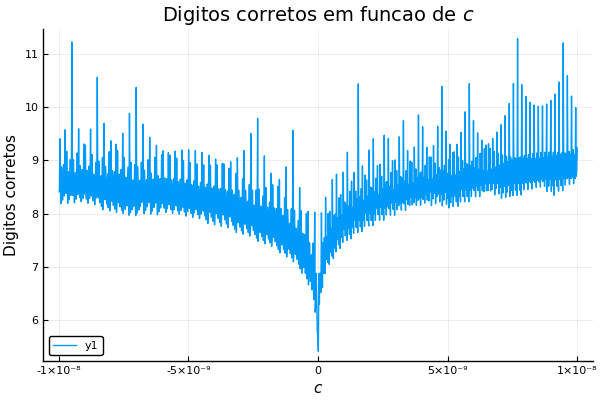

In [14]:
# Usa BigFloat para obter solução de altíssima qualidade e depois converte para Float64.
function raizes_big(a, b, c)
    a, b, c = BigFloat(a), BigFloat(b), BigFloat(c)
    r1, r2 = raizes(a, b, c)
    return float(r1), float(r2)
end

# Coeficientes que definem o polinômio
a = 1.0
b = -1.0
pequeno = 1.0e-8
npontos = 1000
cs = range(-pequeno, stop=pequeno, length=npontos)

# Calcula as raízes de polinomios e guarda os resultados para comparar.
raizes_double = Float64[]   # Raízes calculadas usando precisão double
raizes_bigfloat = Float64[] # Raízes calculadas usando BigFloat
for c in cs
    push!(raizes_double, minimum(raizes(a, b, c)))
    push!(raizes_bigfloat, minimum(raizes_big(a, b, c)))
end    

# Apresenta o gráfico de -log_10 do erro relativo.
# Ou seja, do número de casas decimais corretas.
log_errorel = -log10.(erro_rel(raizes_double, raizes_bigfloat))
plot(cs, log_errorel, 
    #     Para deixar o gráfico bonito
    title ="Digitos corretos em funcao de \$c\$", 
    ylabel ="Digitos corretos",
    xlabel ="\$c\$")

Uma bela figura mostrando que a precisão cai com $c$ próximo de zero, chegando a ter no mínimo quase 5 casas corretas apenas.

A pergunta importante é: como evitar isso? De fato se quiséssemos calcular a raiz maior, próximo de 1, não teríamos problema. Veja isso mudando o sinal da comparação para escolha da raiz no programa acima (troque `minimum` por `maximum`). A ideia agora é usar a raiz boa para estimar a outra. Como fazer isso? Lembremos que
$$
x^2 + bx + c = (x - r_1)(x - r_2) = x^2 - (r_1 + r_2)x + r_1 r_2,
$$
em que $r_1$ e $r_2$ denotam as raízes. Portanto se conhecemos uma raiz, digamos $r_1$, podemos calcular a outra pela expressão
$$
r_2 = \frac{c}{r_1}
$$
que não envolve nenhuma soma ou subtração, logo não há erro de cancelamento.

Vamos usar esse fato em uma versão alternativa para o cálculo de raízes.

In [15]:
function raizes(a, b, c)
    b /= a  #b = b/a 
    c /= a
    a = 1
    
    Δ = b^2 - 4*c
    if Δ < 0
        println("Delta negativo!")
    end
    
    if -b > 0
        r1 = (-b + sqrt(Δ))/2
    else
        r1 = (-b - sqrt(Δ))/2
    end
    r2 = c/r1
    return r1, r2
end

raizes (generic function with 1 method)

Repetindo o teste acima.

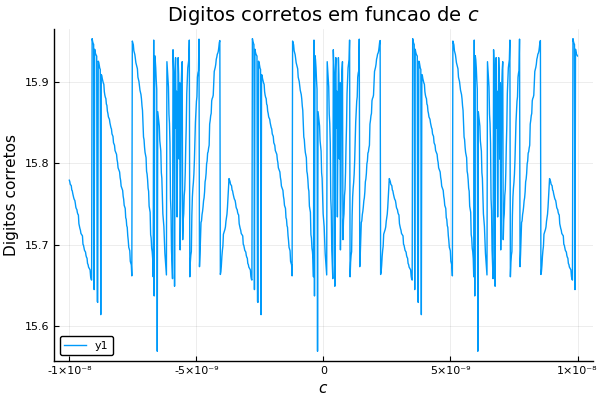

In [16]:
# Recalcula as aproximações em precisão dupla com fórmula sem erro
# de cancelamento.
raizes_double = Float64[]
for c in cs
    push!(raizes_double, minimum(raizes(a, b, c)))
end    

# Apresenta o gráfico de -log_10 do erro relativo.
log_errorel = log10.(erro_rel(raizes_double, raizes_bigfloat))
# Elimina os pontos sem erro
log_errorel = log_errorel[.~isinf.(log_errorel)]
# Plota utilizando Plots 
plot(cs, -log_errorel,
#     Para deixar o gráfico bonito
    title ="Digitos corretos em funcao de \$c\$", 
    ylabel ="Digitos corretos",
    xlabel ="\$c\$")

Note como a precisão se mantém constante, entre 15 e 16 casas decimais, que é tudo o que pode se esperar de cálculos em precisão dupla. O problema, pelo menos nesse caso foi completamente sanado.

## Misturando números de ordem diferente

Outra situação em que ocorre a perda de dígitos significativos em operações de soma/subtração é quando combinamos números com ordens de grandeza diferentes. Um caso radical disso é quando tentamos somar a um número outro valor de módulo menor que o épsilon da máquina vezes o módulo do número. Nesse caso, não importa o quão complicado seja o  número menor, o o resultado vai simplesmente repetir o de maior módulo. Isso vem diretamente da forma de representação de números de ponto flutuante e da definição do épsilon da máquina. Veja:

In [ ]:
# Peça pro Julia o valor pequeno como o eps_mac com relação a aproximação de pi.
eps_pi = eps(Float64(pi))

# Tente somar metade desse valor com a aproximação pi (para garantir que nao 
# arredonda para cima) e compare com a aproximação inicial.
Float64(pi) + 0.5*eps_pi == Float64(pi)

Se isso ocorrer uma única vez não há grande problema, a resposta obtida é uma ótima aproximação do valor real. Mas isso pode ser um problema se queremos somar um número grande a vários valores pequenos. Nesse caso os dígitos menos significativos dos números pequenos vão sendo esquecidos durante a soma com o grande a cada soma. Já se os números pequenos fossem somados juntos poderia ocorrer de eles todos combinados terem um valor mais representativo com relação ao valor maior.

Para deixar isso mais claro vamos mostrar um exemplo. Sabemos que a somatória
$$
\sum_{k = 1}^\infty \frac{1}{k^2} = \frac{\pi^2}{6}.
$$
Podemos estar interessados em verificar isso experimentalmente no computador fazendo uma soma parcial, mas com grande número de termos. Isto é feito na forma mais natural pela rotina abaixo.

In [ ]:
function soma_crescente(N)
    soma = 0.0f0
    for k = 1:N
        soma += 1.0f0/(k*k)
    end
    return soma
end

Obs: Note que no código acima a variável `soma` é inicializada com `0.0f0` que é o 0 de precisão simples. Usamos precisão simples para ver os problemas mais facilmente. De uma maneira geral, para Julia, uma constante numérica do tipo `1.5` é um número de precisão dupla. Ou seja, para Julia, os números são em geral de precisão dupla. Para forçar a criação de números com precisão simples precisamos usar a função `Float32` ou deixar claro que a constante é desse tipo com a letra `f` em uma representação em notação científica do número. Se no lugar de `f` aparece o usual `e` a constante seria intepretada como um `Float64` ou seja um número de precisão dupla. 

Podemos então comparar qual a precisão que conseguimos alcançar com essa rotina com um código simples.

In [ ]:
# Calcula os erros relativos para valores de N como potencias de 2 de 1 a 2^30. 
N = 1
erros = Float32[]
Ns = Int[]
for i = 0:30
    push!(Ns, N)
    push!(erros, erro_rel(soma_crescente(N), pi*pi/6))
    N *= 2
end

# Apresenta o gráfico de -log_10 do erro relativo.
log_errorel = log10.(erros)
plot(log2.(Ns), -log_errorel, 
# Para deixar o gráfico bonito
    label = ("Ordem crescente"),
    marker=:c,
    title = ("Dígitos corretos em função de \$N\$"),
    xlims = (0, 35),
    xlabel = ("\$ \\log_2 N \$"),
    ylims = (0, 6),
    ylabel = ("Dígitos corretos"),
    )

Note que nessas somas, quando $k$ é grande, então $1/k^2$ é muito pequeno em relação a parte inicial da soma já calculada, que iniciou em 1 e cresce. Assim, a partir de um certo ponto os valores $1/k^2$ não importam mais. Com isso você pode ver que a precisão atingida com números de precisão simples chega apenas a 4 casas, ao invés das 8 casas esperadas. 

Vamos agora ver o que ocorre se fizermos a soma do menor número para o maior.

In [ ]:

# Define a nova versão agora somando do menor para o maior.
function soma_decrescente(N)
    soma = 0.0f0
    for k = N:-1:1
        soma += 1.0f0/(k*k)
    end
    return soma
end

# Calcula os erros relativos para valores de N como potencias de 2 de 1 a 2^30. 
N = 1
erros_dec = Float32[]
for i = 0:30
    push!(erros_dec, erro_rel(soma_decrescente(N), pi*pi/6))
    N *= 2
end
# Apresenta o gráfico original de -log_10 do erro com soma cresence.
plot(log2.(Ns), -log_errorel,  label = ("Ordem crescente"), marker=:c)
log_errorel = log10.(erros_dec)
plot!(log2.(Ns), -log_errorel, marker=:d, label="Ordem decrescente",
# Para deixar o gráfico bonito
legend= (:bottomright),
title = ("Dígitos corretos em função de \$N\$"),
ylabel = ("Dígitos corretos"),
xlabel = ("\$ \\log_2 N \$"))

Observe que seguindo a ordem decrescente a precisão máxima para números de precisão simples, de 8 casas, é atingida.